- Scrapbox
    + https://scrapbox.io/komofr/%E3%83%8F%E3%83%96PEP

# 背景とやること
- BPStudy#135〜エンジニアの知的生産術でPEPのネットワーク分析のLTをした
- toggeterを見たら西尾さん([@nishio https://twitter.com/nishio])のコメントがあった
    + BPStudy#135〜エンジニアの知的生産術 まとめ
    + https://togetter.com/li/1293489

> 巨大なグループになっちゃうのはPEP8などがハブになるからでは #bpstudy

- PEP8もそうだけど、多分Release Schedule系のPEPも関係しているんじゃないかなと思った
- が、最近のデータでちゃんと調べていないので、ここに調べた結果を書く

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pep_graph = nx.read_gpickle('../data/201812/pep_graph_20181220-121822.gpickle')

print(nx.info(pep_graph))

Name: 
Type: DiGraph
Number of nodes: 479
Number of edges: 1019
Average in degree:   2.1273
Average out degree:   2.1273


In [3]:
# 一覧で見やすいようにデータフレーム形式に変換
nx.set_node_attributes(pep_graph, dict(pep_graph.degree()), 'degree')
nx.set_node_attributes(pep_graph, dict(pep_graph.in_degree()), 'in_degree')
nx.set_node_attributes(pep_graph, dict(pep_graph.out_degree()), 'out_degree')

df = pd.DataFrame(dict(pep_graph.nodes(data=True)))
df = df.T

In [4]:
# 列を絞り込み
df = df[['Title', 'Type', 'Status', 'Created', 'degree', 'in_degree', 'out_degree']]
df.head(5)

,Title,Type,Status,Created,degree,in_degree,out_degree
0001,PEP Purpose and Guidelines,Process,Active,13-Jun-2000,19,11,8
0002,Procedure for Adding New Modules,Process,Final,07-Jul-2001,8,4,4
0003,Guidelines for Handling Bug Reports,Process,Withdrawn,25-Sep-2000,4,3,1
0004,Deprecation of Standard Modules,Process,Active,1-Oct-2000,9,7,2
0005,Guidelines for Language Evolution,Process,Active,26-Oct-2000,5,5,0


# 入次数 Top10（他のPEPから沢山参照されているPEP）

In [5]:
df.sort_values(by='in_degree', ascending=False).head(10)

,Title,Type,Status,Created,degree,in_degree,out_degree
0008,Style Guide for Python Code,Process,Active,05-Jul-2001,29,21,8
0302,New Import Hooks,Standards Track,Final,19-Dec-2002,20,16,4
0426,Metadata for Python Software Packages 2.0,Informational,Withdrawn,30 Aug 2012,29,14,15
0343,"The ""with"" Statement",Standards Track,Final,13-May-2005,19,13,6
0342,Coroutines via Enhanced Generators,Standards Track,Final,10-May-2005,17,12,5
0345,Metadata for Python Software Packages 1.2,Standards Track,Final,28-Apr-2005,15,11,4
0001,PEP Purpose and Guidelines,Process,Active,13-Jun-2000,19,11,8
0484,Type Hints,Standards Track,Provisional,29-Sep-2014,21,10,11
0384,Defining a Stable ABI,Standards Track,Final,17-May-2009,13,10,3
0255,Simple Generators,Standards Track,Final,18-May-2001,12,9,3


# 出次数 Top10（他のPEPを沢山参照しているPEP）

In [6]:
df.sort_values(by='out_degree', ascending=False).head(10)

,Title,Type,Status,Created,degree,in_degree,out_degree
0398,Python 3.3 Release Schedule,Informational,Final,23-Mar-2011,22,1,21
0429,Python 3.4 Release Schedule,Informational,Active,17-Oct-2012,20,1,19
0283,Python 2.3 Release Schedule,Informational,Final,27-Feb-2002,18,0,18
3100,Miscellaneous Python 3.0 Plans,Process,Final,20-Aug-2004,22,5,17
0320,Python 2.4 Release Schedule,Informational,Final,29-Jul-2003,16,0,16
0494,Python 3.6 Release Schedule,Informational,Active,30-May-2015,16,0,16
0426,Metadata for Python Software Packages 2.0,Informational,Withdrawn,30 Aug 2012,29,14,15
0478,Python 3.5 Release Schedule,Informational,Active,22-Sep-2014,13,0,13
0537,Python 3.7 Release Schedule,Informational,Active,23-Dec-2016,12,0,12
0356,Python 2.5 Release Schedule,Informational,Final,07-Feb-2006,12,0,12


- Release Schedule系が多い(Top10の内8件）
    - 機能の追加や変更が発生するとRelease Scheduleにまとめられるので、出次数が多くなるのは自然だと考えられる。 
- PEP 426は入次数Top10にも出次数Top10にもランクインしている

Release Schedule系を除外したランキングを見てみる。

In [7]:
df['is_release_schedule'] = df.Title.apply(lambda x: 'Release Schedule' in x)
df[~ df.is_release_schedule].sort_values(by='out_degree', ascending=False).head(10)

,Title,Type,Status,Created,degree,in_degree,out_degree,is_release_schedule
3100,Miscellaneous Python 3.0 Plans,Process,Final,20-Aug-2004,22,5,17,False
0426,Metadata for Python Software Packages 2.0,Informational,Withdrawn,30 Aug 2012,29,14,15,False
0484,Type Hints,Standards Track,Provisional,29-Sep-2014,21,10,11,False
8000,Python Language Governance Proposal Overview,Informational,Active,2018-08-24,13,3,10,False
0411,Provisional packages in the Python standard li...,Informational,Active,2012-02-10,14,5,9,False
0001,PEP Purpose and Guidelines,Process,Active,13-Jun-2000,19,11,8,False
0395,Qualified Names for Modules,Standards Track,Withdrawn,4-Mar-2011,12,4,8,False
0008,Style Guide for Python Code,Process,Active,05-Jul-2001,29,21,8,False
0408,Standard library __preview__ package,Standards Track,Rejected,2012-01-07,8,1,7,False
0563,Postponed Evaluation of Annotations,Standards Track,Accepted,8-Sep-2017,10,3,7,False


- Release Schedule系を除くと、PEP 484, 1, 8も、入次数/出次数ともにTop10に入っている

# 次数 Top10（他のPEPとの参照・被参照が多いPEP）

In [8]:
df.sort_values(by='degree', ascending=False).head(10)

,Title,Type,Status,Created,degree,in_degree,out_degree,is_release_schedule
0426,Metadata for Python Software Packages 2.0,Informational,Withdrawn,30 Aug 2012,29,14,15,False
0008,Style Guide for Python Code,Process,Active,05-Jul-2001,29,21,8,False
0398,Python 3.3 Release Schedule,Informational,Final,23-Mar-2011,22,1,21,True
3100,Miscellaneous Python 3.0 Plans,Process,Final,20-Aug-2004,22,5,17,False
0484,Type Hints,Standards Track,Provisional,29-Sep-2014,21,10,11,False
0302,New Import Hooks,Standards Track,Final,19-Dec-2002,20,16,4,False
0429,Python 3.4 Release Schedule,Informational,Active,17-Oct-2012,20,1,19,True
0001,PEP Purpose and Guidelines,Process,Active,13-Jun-2000,19,11,8,False
0343,"The ""with"" Statement",Standards Track,Final,13-May-2005,19,13,6,False
0283,Python 2.3 Release Schedule,Informational,Final,27-Feb-2002,18,0,18,True


- PEP 426とPEP 8が1位（タイ）

メモ
- 入次数/出次数/次数が多いPEPにも種類があるのではないか
    + 今後も次数が増えると思われるPEP, 今は多いが今後も増え続けるとは考えられないPEP
    + PEP 8, PEP 1は前者
        - 言語機能の追加/変更やプロセスの追加/変更があると、リンクの追加が発生しそう
    + Release Schedule系は後者
        - 各PEP自体はそれ以上次数が増え続けるとは考えづらい
        - が、新しいRelease Schedule系はPythonのリリース毎に作られる
        - つまり「そこそこ出次数を持ったPEPが定期的に作られる」ことになる
        - PEP 8、PEP 1は特定の種類のPEPとしか繋がらないが、Release Schedule系は「その時期にリリースされた（比較的）できたばかりの新しいPEP」と繋がる
            - (TODO) 特定の種類のPEPってなんだ？？
- 「今後も次数が増えそうか増えそうでないか」をデータから判断できないか？
    - 隣り合うPEPのCreatedが判断材料にならないか？
        - Createdの幅が広い（昔のPEPにも最近のPEPにも参照関係がある）と、今後も増えていくと言えるか？
            - ロングセラーPEP
            - PEP 8に隣り合うPEPのうち、最古のPEPは2001, 最新のPEPは2018
        - Createdが最近のPEPが多いと、今後も増え続ける可能性が高いと言えるか？
            - トレンドPEP
            - PEP 484など

In [9]:
top_pep = df.sort_values(by='degree', ascending=False).head(20)
top_pep['Status'].value_counts()

Final          11
Active          7
Provisional     1
Withdrawn       1
Name: Status, dtype: int64

In [10]:
top_pep

,Title,Type,Status,Created,degree,in_degree,out_degree,is_release_schedule
0426,Metadata for Python Software Packages 2.0,Informational,Withdrawn,30 Aug 2012,29,14,15,False
0008,Style Guide for Python Code,Process,Active,05-Jul-2001,29,21,8,False
0398,Python 3.3 Release Schedule,Informational,Final,23-Mar-2011,22,1,21,True
3100,Miscellaneous Python 3.0 Plans,Process,Final,20-Aug-2004,22,5,17,False
0484,Type Hints,Standards Track,Provisional,29-Sep-2014,21,10,11,False
0302,New Import Hooks,Standards Track,Final,19-Dec-2002,20,16,4,False
0429,Python 3.4 Release Schedule,Informational,Active,17-Oct-2012,20,1,19,True
0001,PEP Purpose and Guidelines,Process,Active,13-Jun-2000,19,11,8,False
0343,"The ""with"" Statement",Standards Track,Final,13-May-2005,19,13,6,False
0283,Python 2.3 Release Schedule,Informational,Final,27-Feb-2002,18,0,18,True


- 次数Top 20のPEPのStatusは、Final（11件）、Active（7件）、Provisional （1件）と進んでいるPEPが多い
- そんな中、燦然と鈍く輝くWithdrawnの[PEP426]（次数タイ1位）

# 次数分布

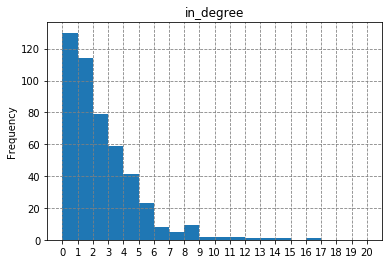

In [11]:
# 入次数の分布
column_name = 'in_degree'
max_value = df[column_name].max()

df[column_name].plot.hist(bins=range(0, max_value, 1))
plt.xticks(range(0, max_value, 1))
plt.grid(which='major',color='gray', linestyle='--')
plt.title(column_name)
plt.show()

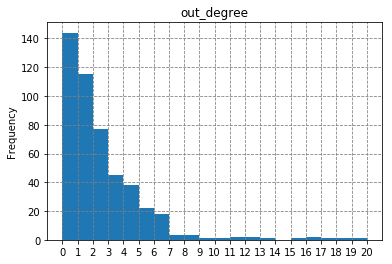

In [12]:
# 出次数の分布
column_name = 'out_degree'
max_value = df[column_name].max()

df[column_name].plot.hist(bins=range(0, max_value, 1))
plt.xticks(range(0, max_value, 1))
plt.grid(which='major',color='gray', linestyle='--')
plt.title(column_name)
plt.show()

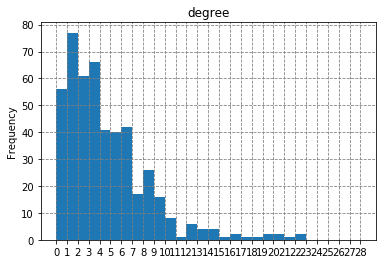

In [13]:
# 次数の分布
column_name = 'degree'
max_value = df[column_name].max()

df[column_name].plot.hist(bins=range(0, max_value, 1))
plt.xticks(range(0, max_value, 1))
plt.grid(which='major',color='gray', linestyle='--')
plt.title(column_name)
plt.show()